<a href="https://colab.research.google.com/github/CongNgX/abnormal/blob/main/Abnormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Aug 18 08:09:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              47W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00


In [6]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 815M
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt.1
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt.1
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt.1
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt.1
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt.1
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt.1


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qcRjBsTtcUqzVPgkEMFR")
project = rf.workspace("congnx").project("window-class")
version = project.version(7)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Window-class-7 in yolov8:: 100%|██████████| 1840/1840 [00:00<00:00, 7579.18it/s]


In [8]:
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [9]:
%cd {HOME}

!yolo task=detect mode=train epochs=215 batch=30 plots=True \
model={HOME}/weights/yolov10x.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10x.pt, data=/content/Window-class-7/data.yaml, epochs=220, time=None, patience=100, batch=30, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

In [10]:
from IPython.display import Image
from ultralytics import YOLOv10

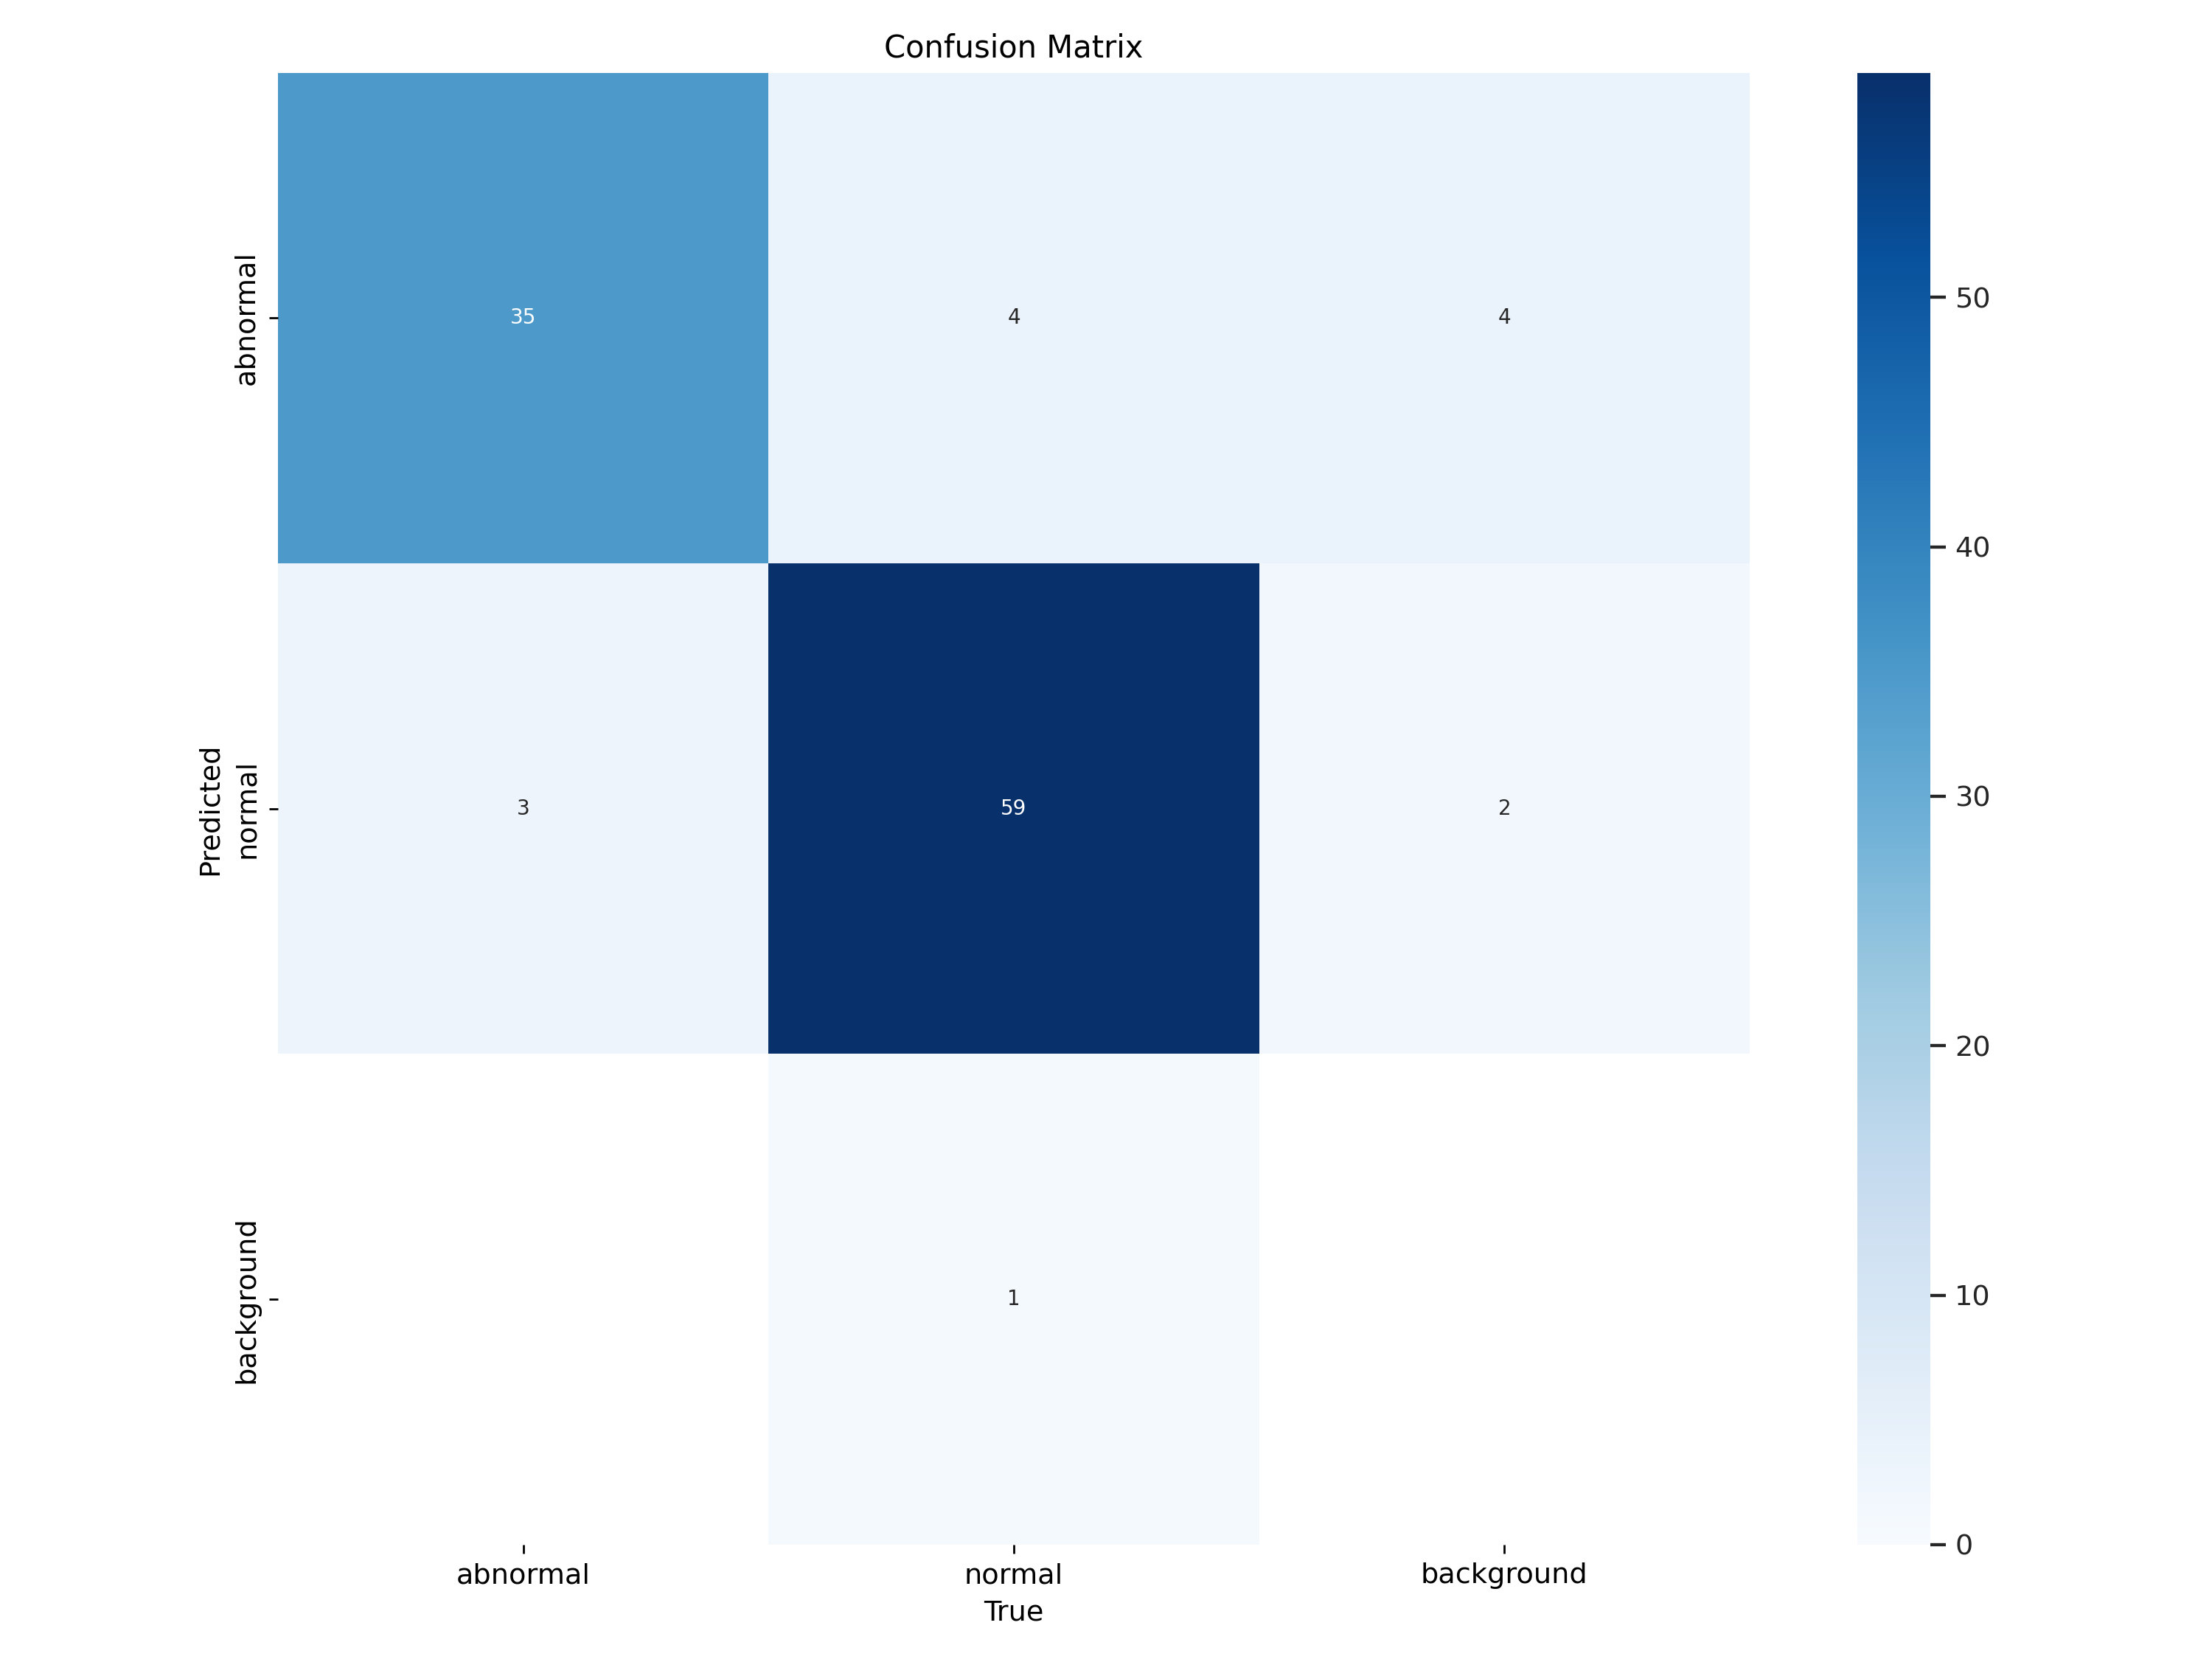

In [11]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

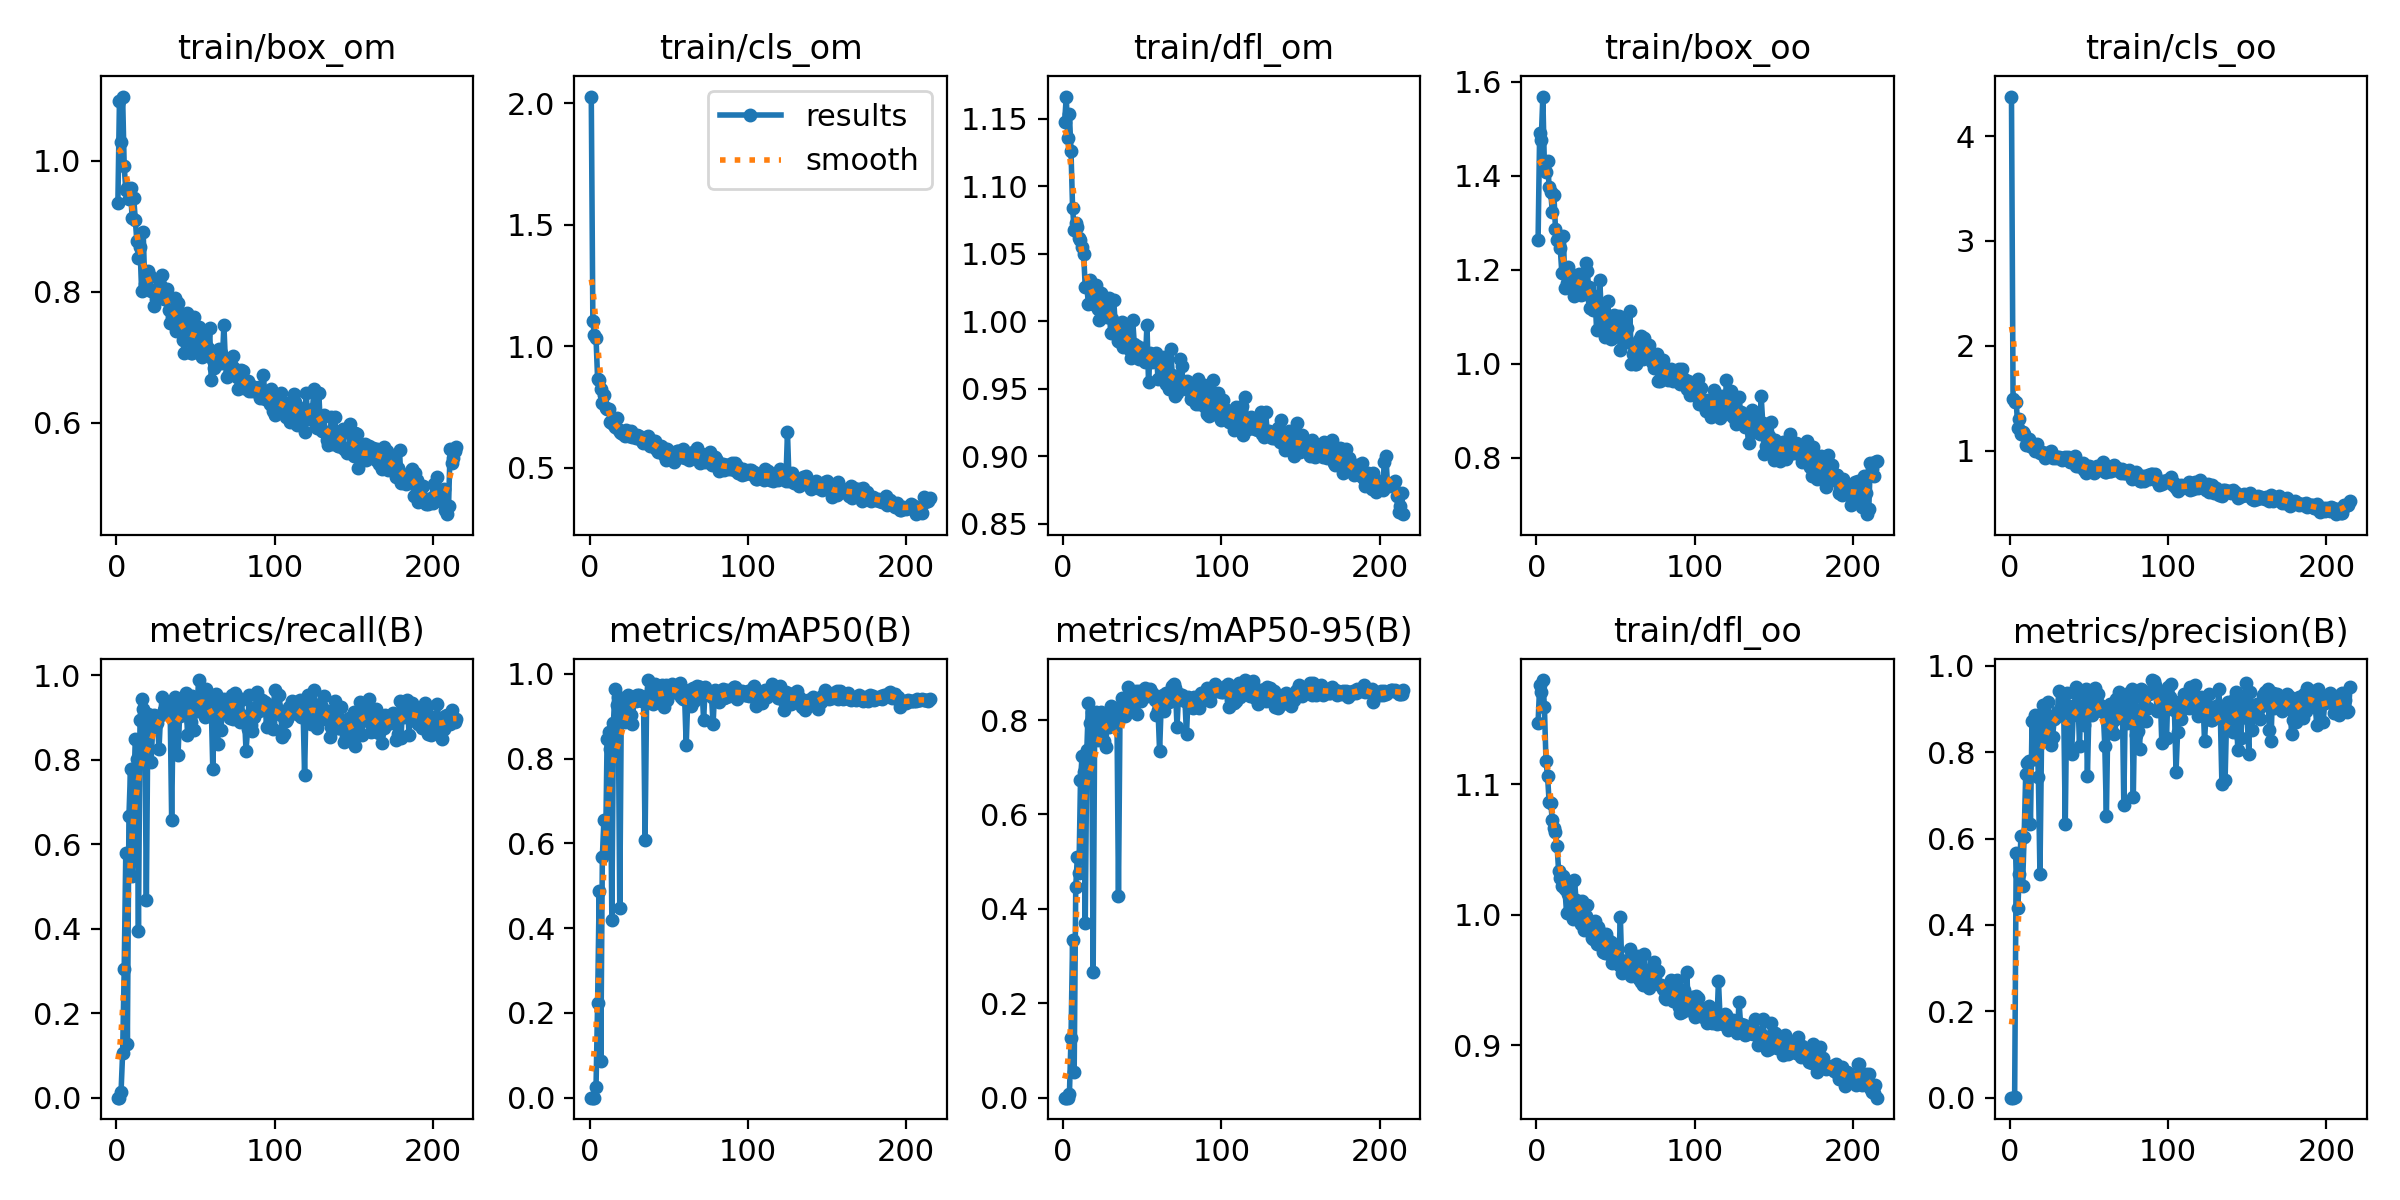

In [12]:
Image(filename='/content/runs/detect/train/results.png', width=600)


In [14]:
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLOv10(model_path)
results = model(source='/content/Window-class-7/test/images', conf=0.25,save=True)



image 1/36 /content/Window-class-7/test/images/-1_3_0_2024_01_11_12_18_38_MAX_3009_jpg.rf.31316761c26065f0a0eddc0177d0ad05.jpg: 640x640 4 normals, 18.3ms
image 2/36 /content/Window-class-7/test/images/-1_3_0_2024_01_11_12_36_16_MAX_3130_JPG.rf.f1f3111cd7cdfb2eb8c903694fefdacd.jpg: 640x640 2 abnormals, 2 normals, 17.7ms
image 3/36 /content/Window-class-7/test/images/-1_3_0_2024_01_11_12_36_26_MAX_3131_JPG.rf.a4dc248ddf6313f5d1b5fe86ea67a7a8.jpg: 640x640 2 abnormals, 1 normal, 17.6ms
image 4/36 /content/Window-class-7/test/images/-1_3_0_2024_01_11_12_41_14_MAX_3147_JPG.rf.6ac30d9ab1b76aff611803c3373e7ce6.jpg: 640x640 1 abnormal, 9 normals, 17.9ms
image 5/36 /content/Window-class-7/test/images/-1_3_0_2024_01_11_12_41_22_MAX_3149_JPG.rf.d45d7e93d468ff5329b735d5b603c0c3.jpg: 640x640 6 normals, 17.5ms
image 6/36 /content/Window-class-7/test/images/-1_3_0_2024_01_11_12_45_06_MAX_3176_JPG.rf.001d13183ad280803f63347549f6916a.jpg: 640x640 3 abnormals, 6 normals, 16.9ms
image 7/36 /content/Windo

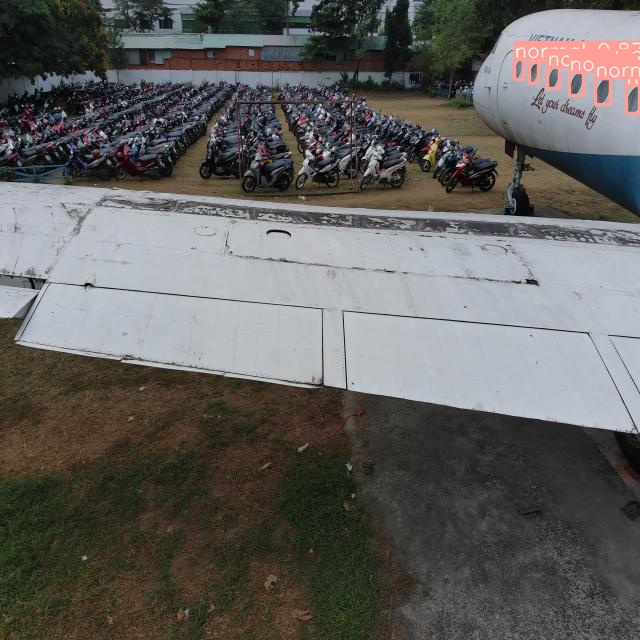

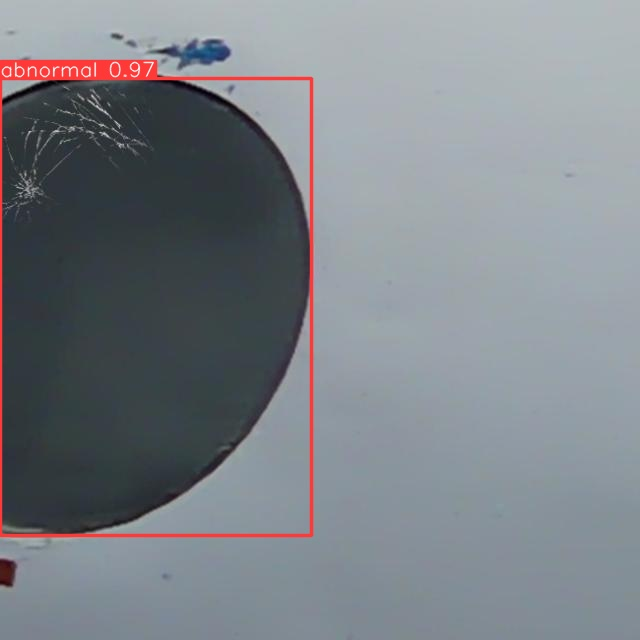

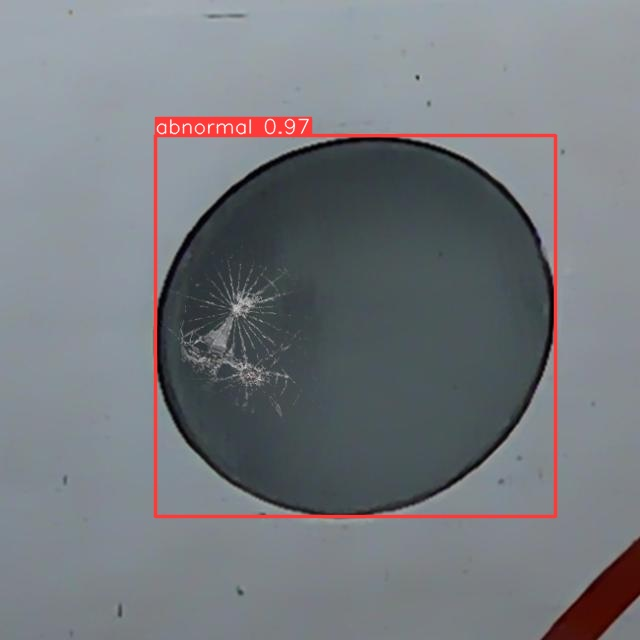

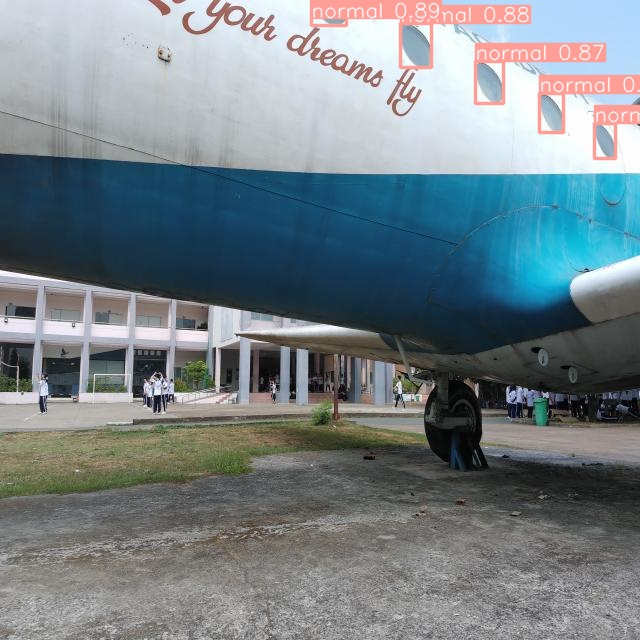

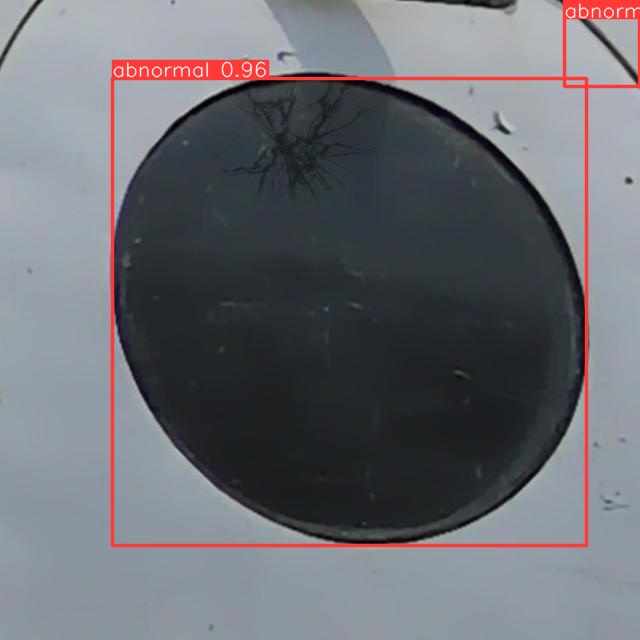

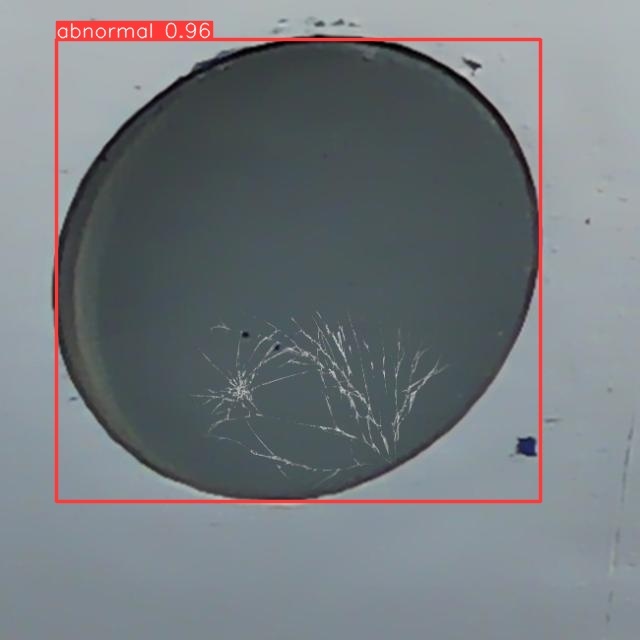

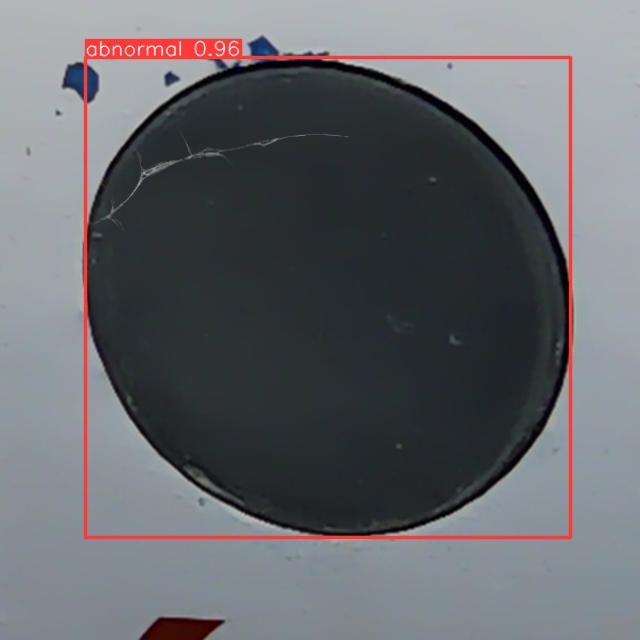

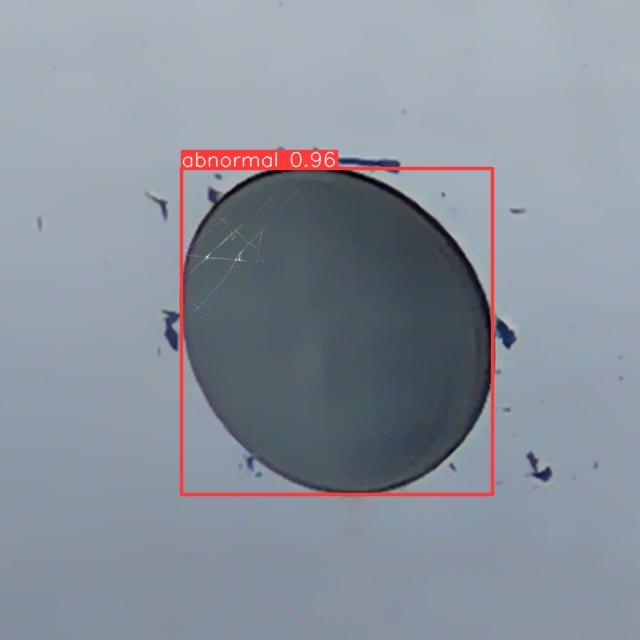

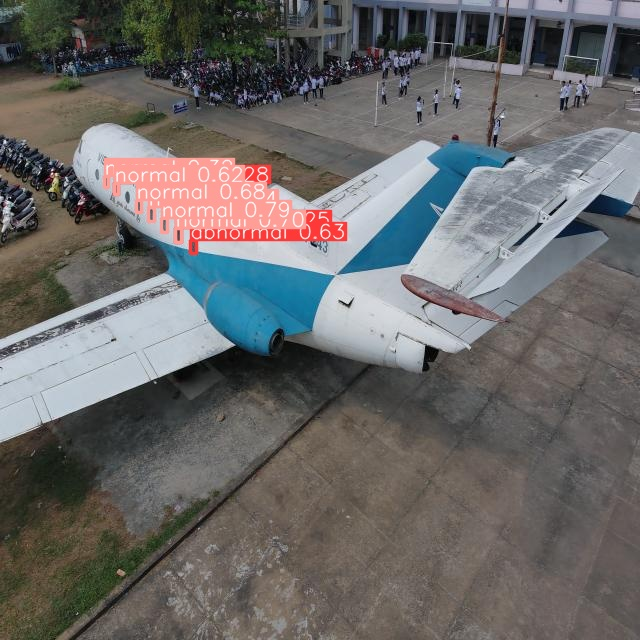

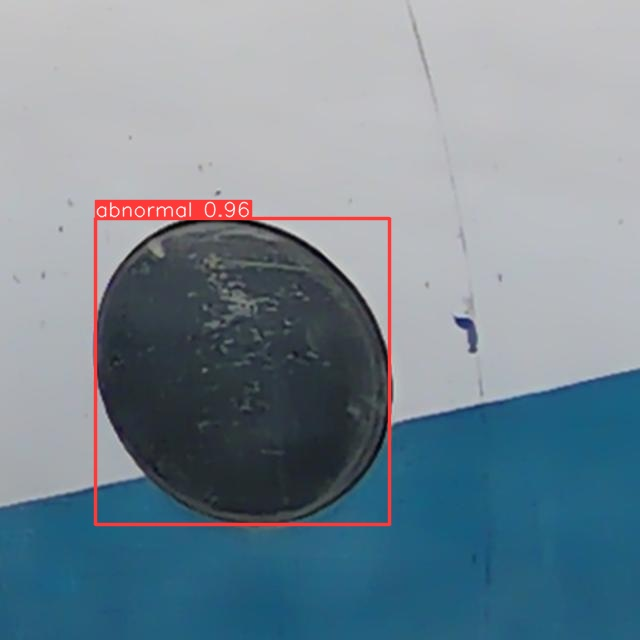

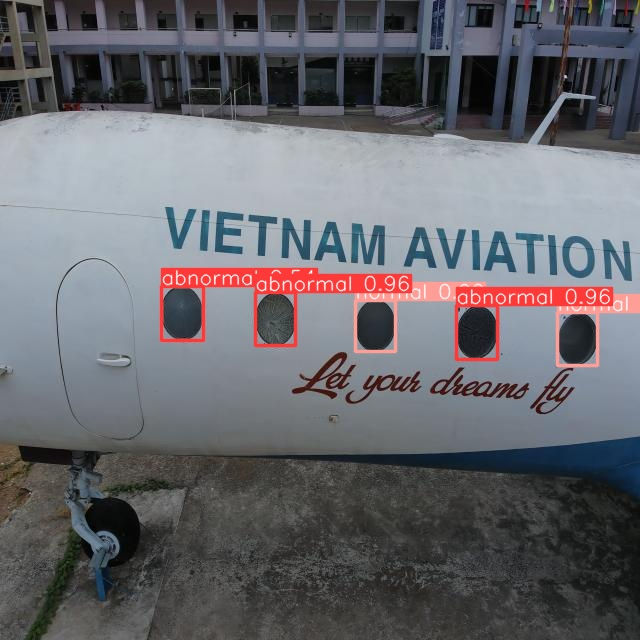

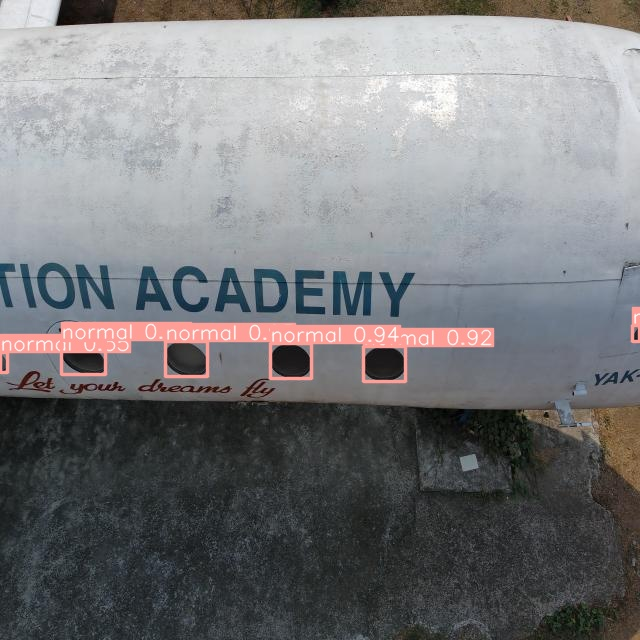

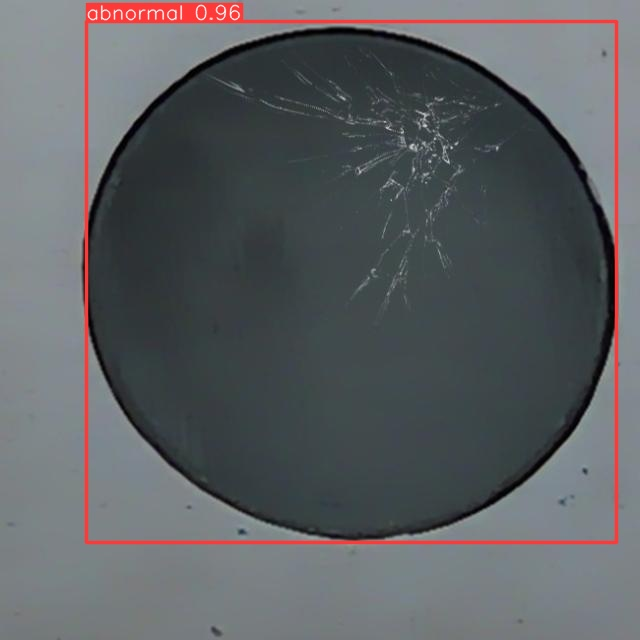

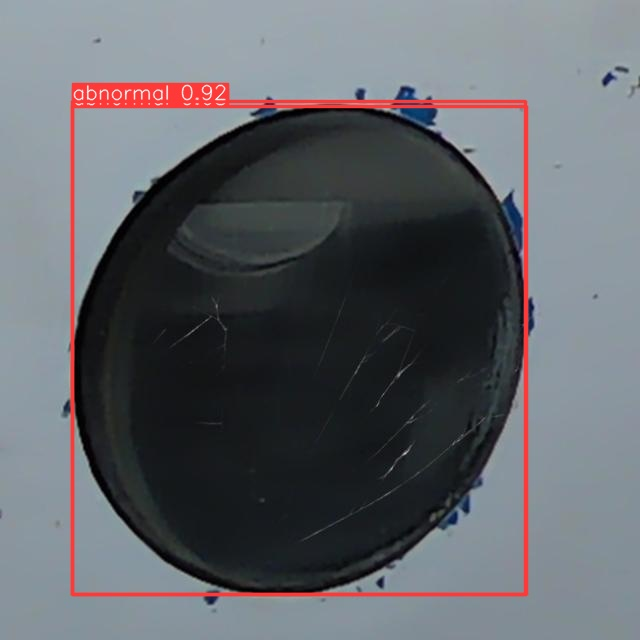

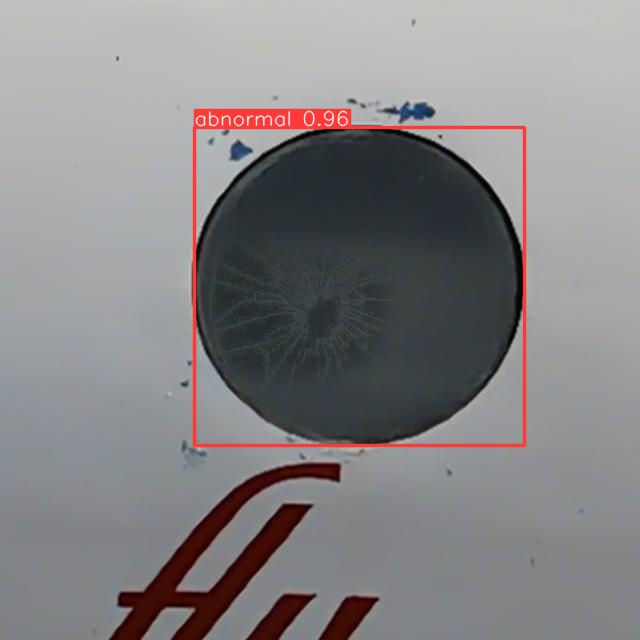

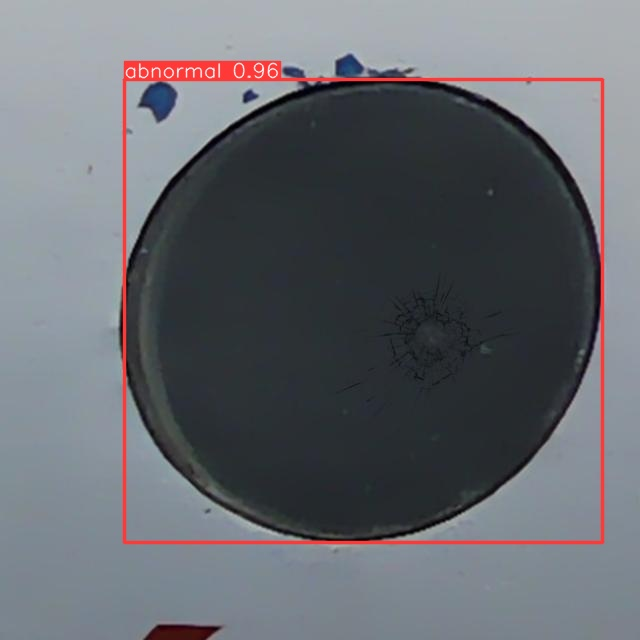

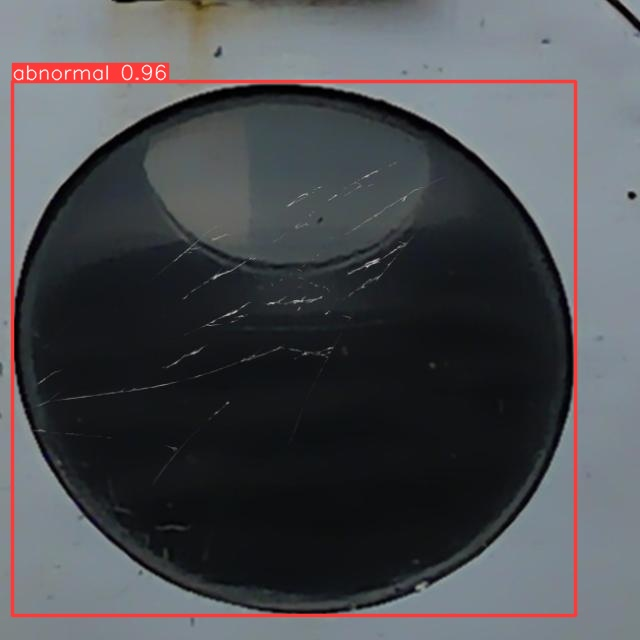

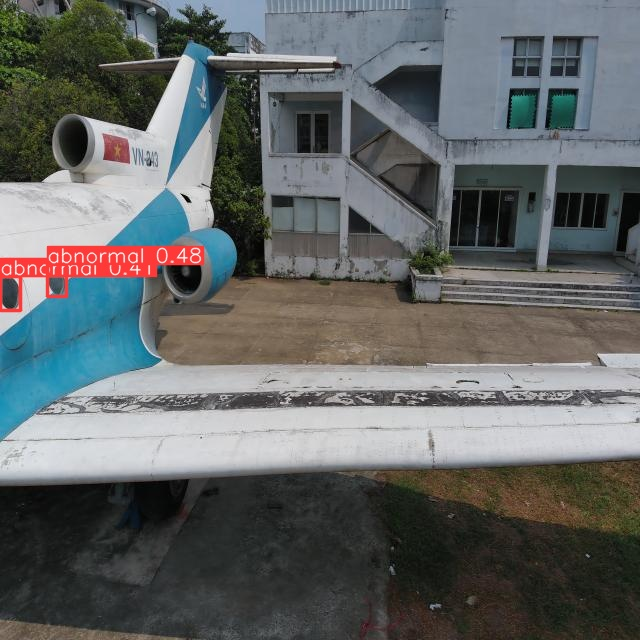

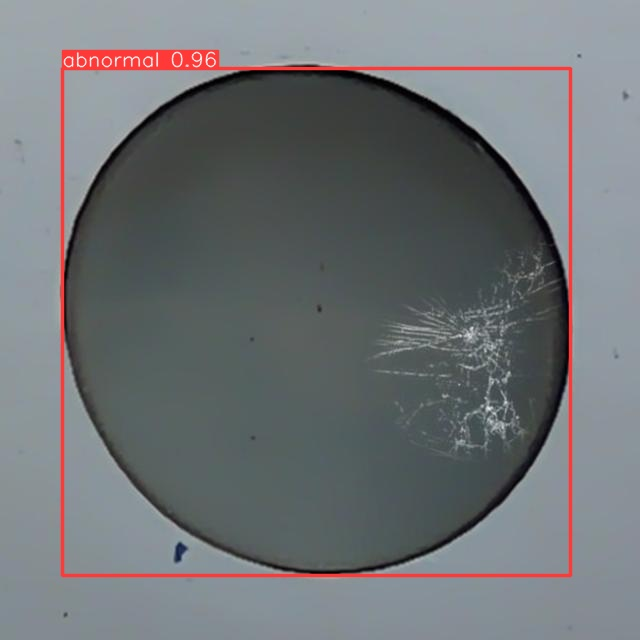

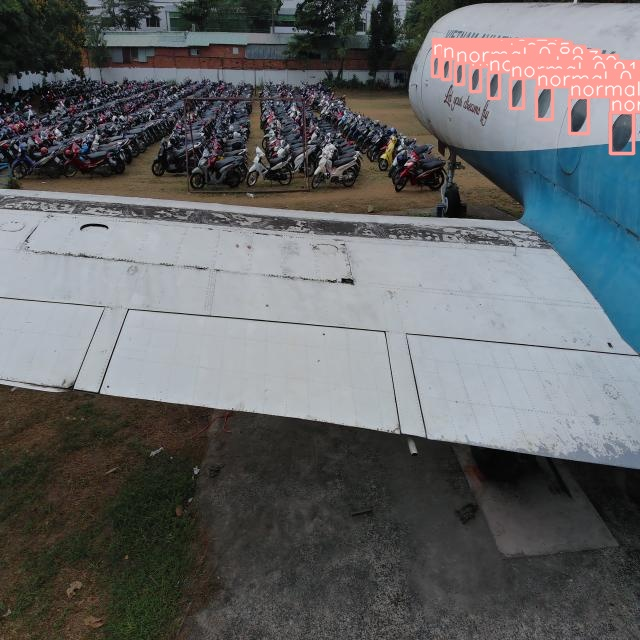

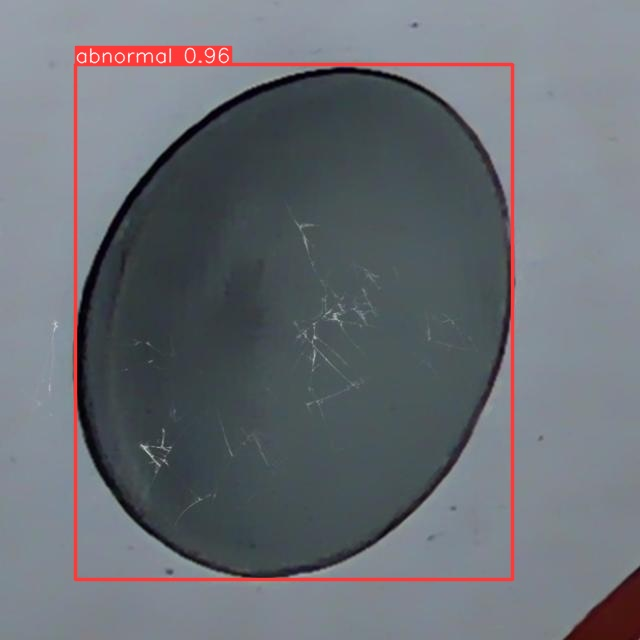

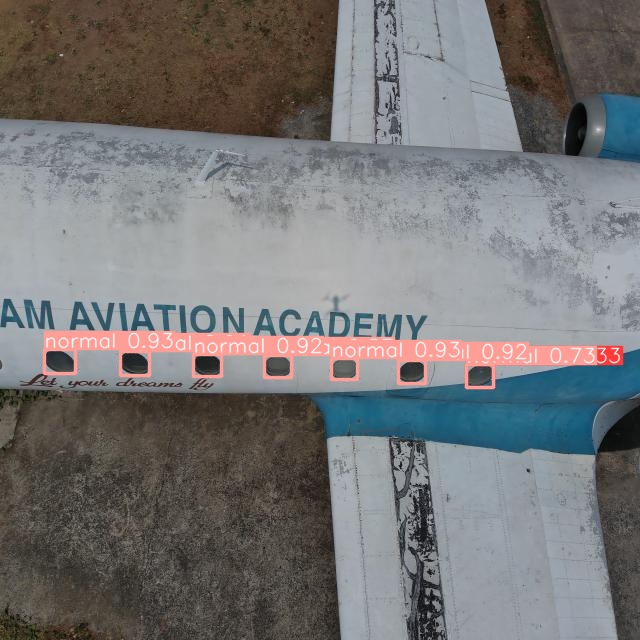

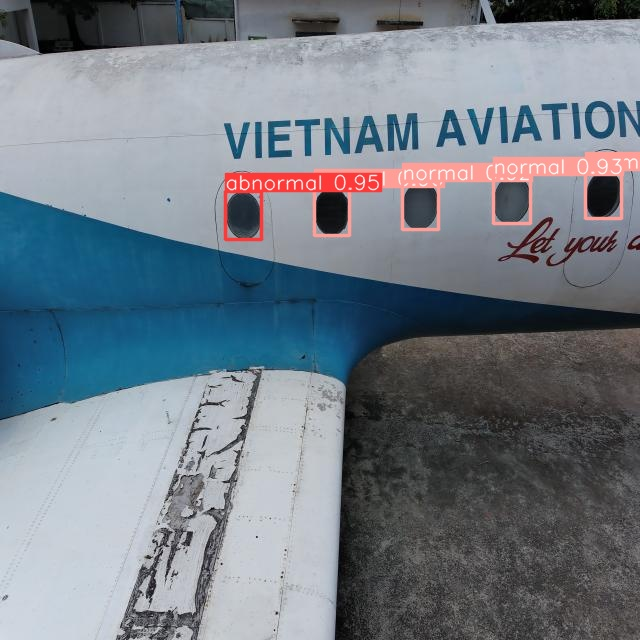

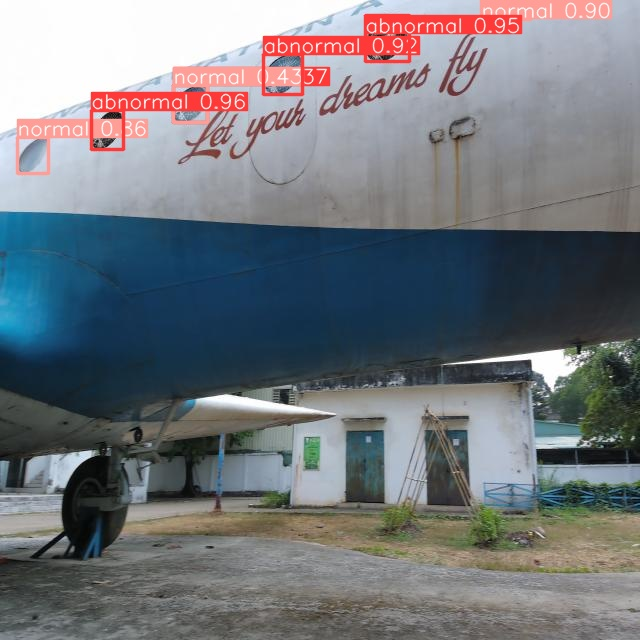

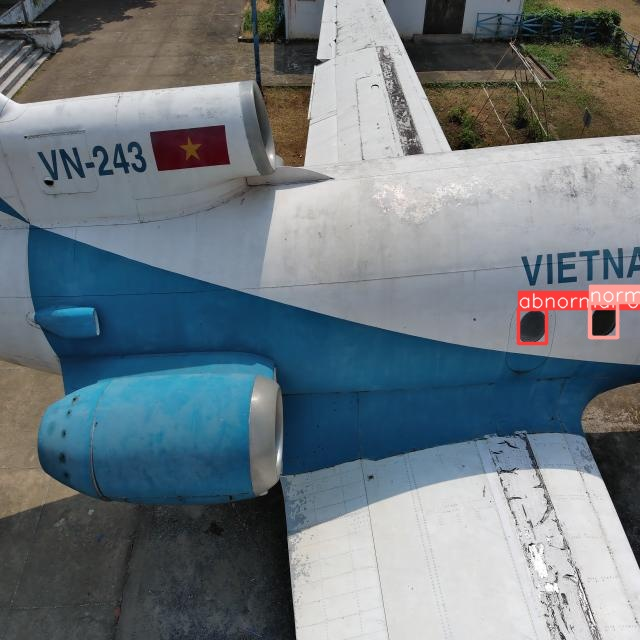

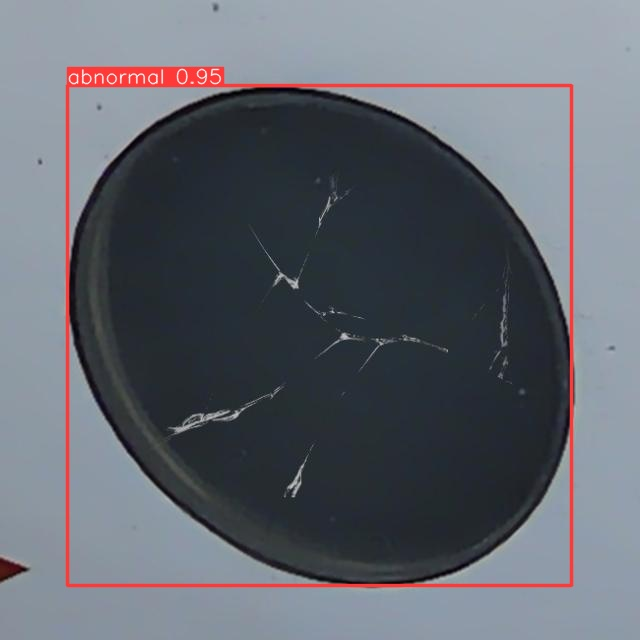

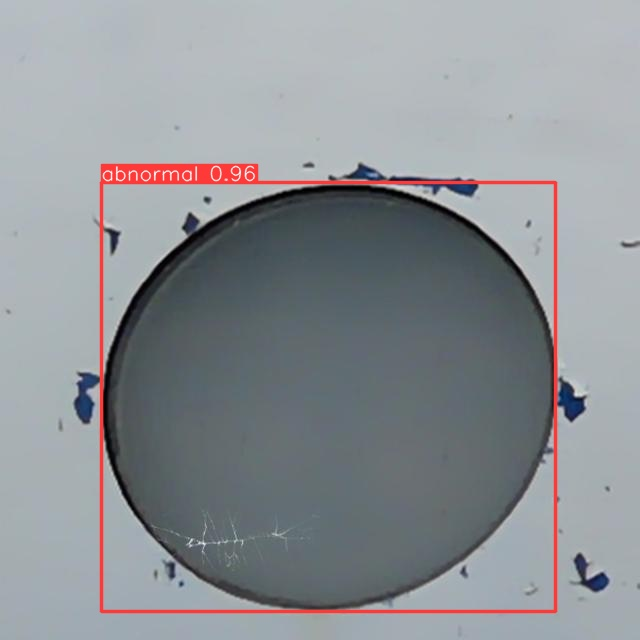

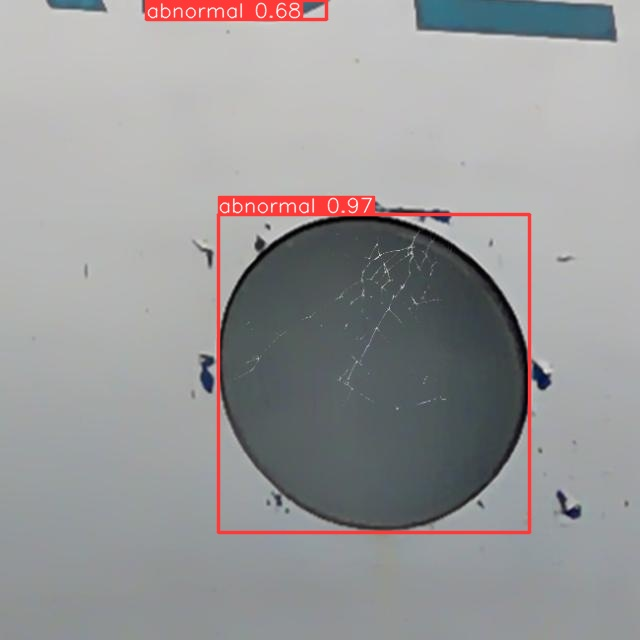

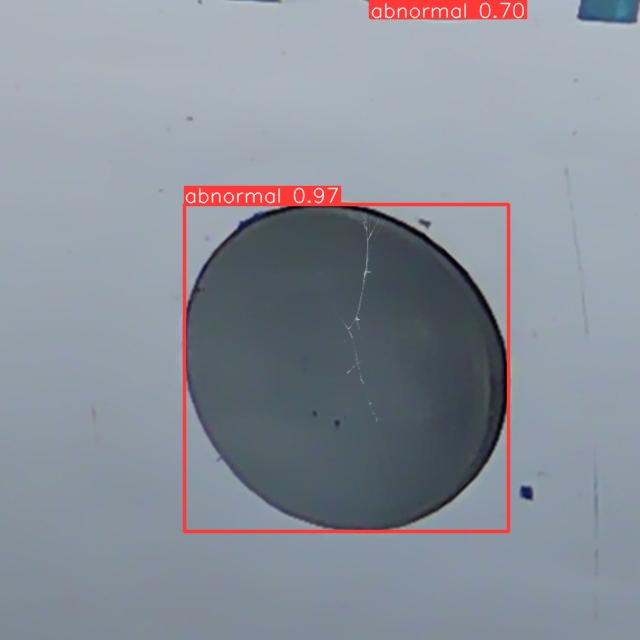

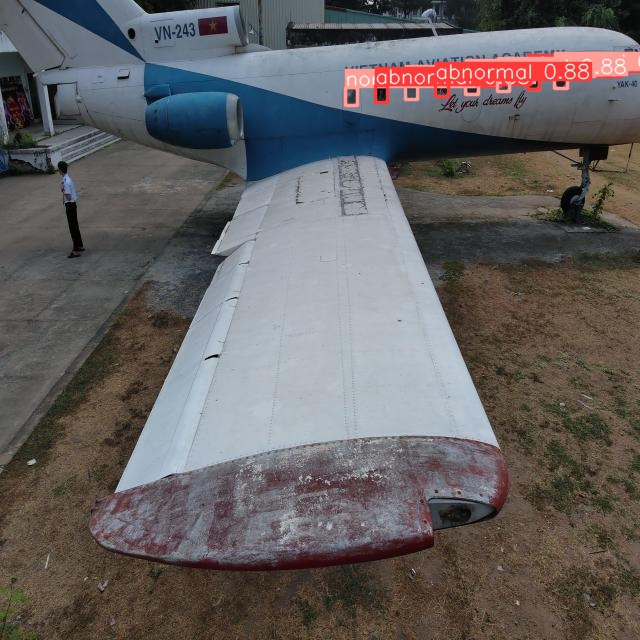

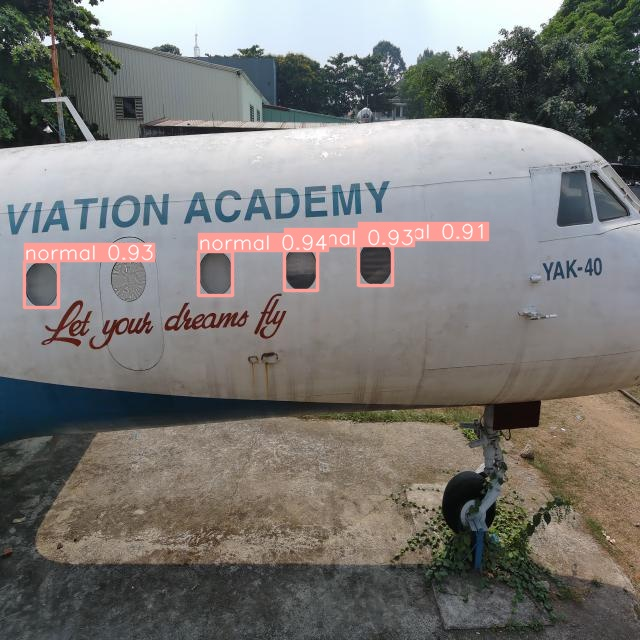

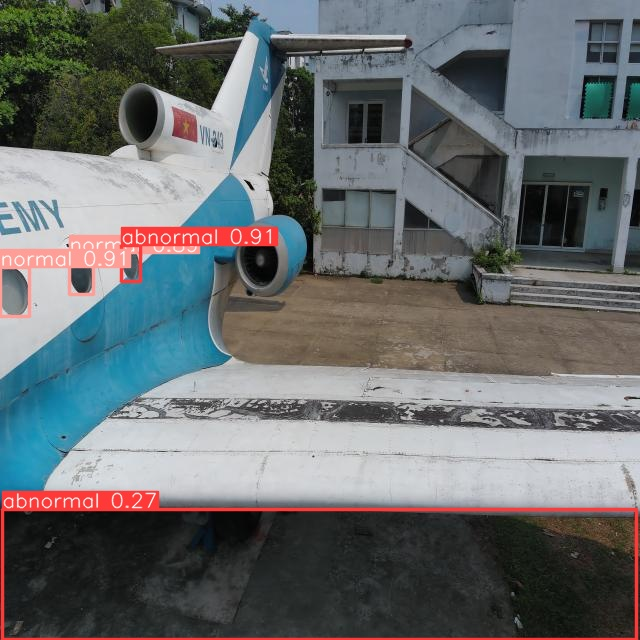

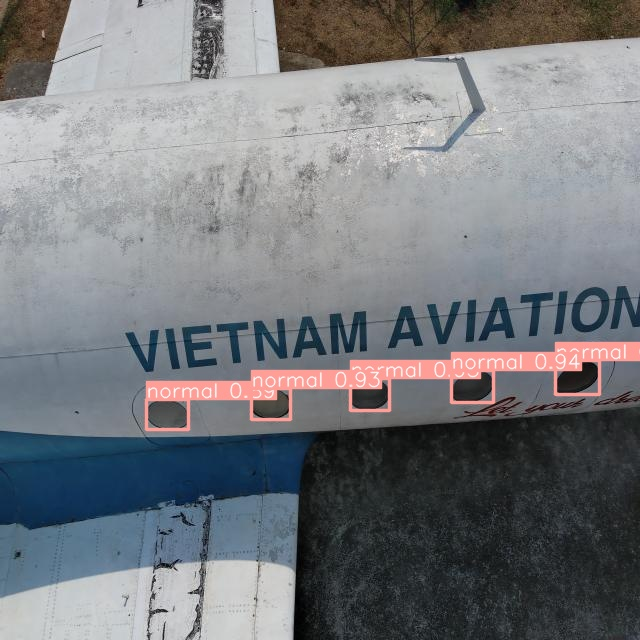

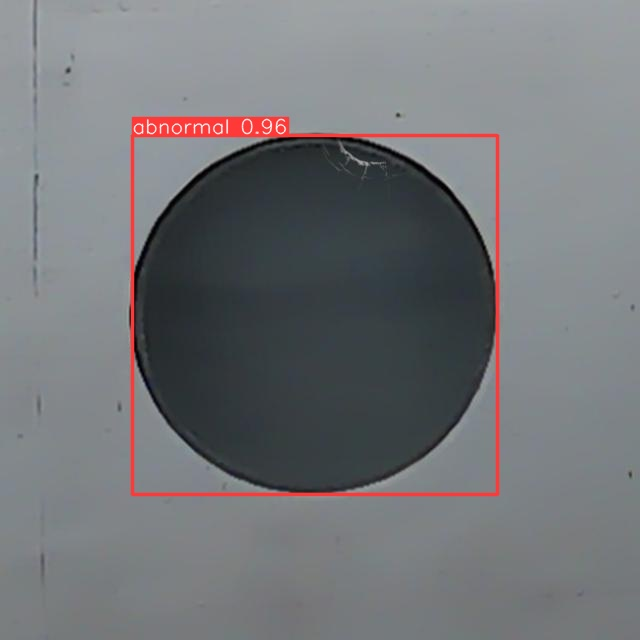

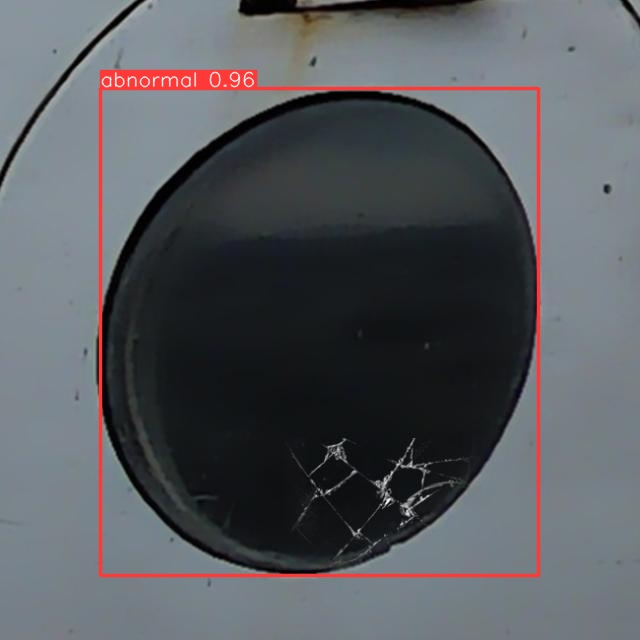

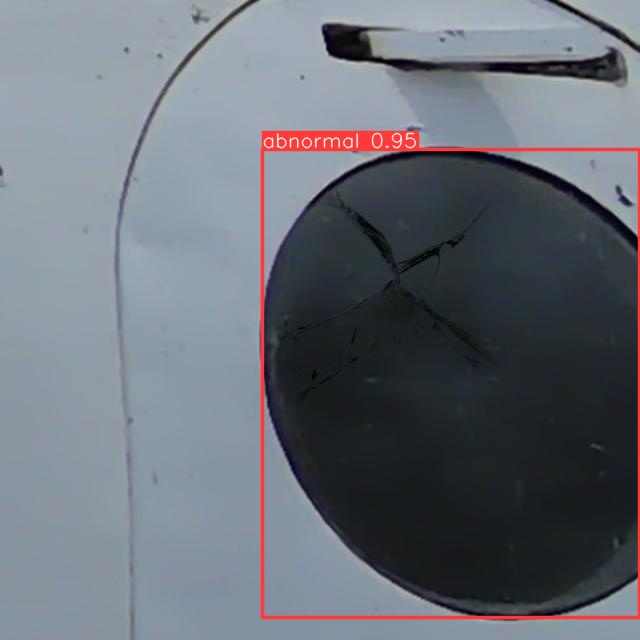

In [16]:
import glob
images = glob.glob('/content/runs/detect/predict/*.jpg')
for image in images:
  display(Image(filename = image,width=400))

In [17]:
from datetime import datetime
import pytz

VietNamTz = pytz.timezone("Asia/Ho_Chi_Minh")

# datetime object containing current date and time
now = datetime.now(tz=VietNamTz)
print(f'Current time: {now}')

cur_time = now.strftime("%Y%m%d_%H%M%S")
save_name = f'train_{cur_time}'

zip_filename = f'{save_name}.zip'

%cd {HOME}/runs/detect/
!zip -r {HOME}/{zip_filename} train


Current time: 2024-08-18 16:30:13.077324+07:00
/content/runs/detect
  adding: train/ (stored 0%)
  adding: train/confusion_matrix_normalized.png (deflated 32%)
  adding: train/train_batch1.jpg (deflated 5%)
  adding: train/train_batch2.jpg (deflated 5%)
  adding: train/labels_correlogram.jpg (deflated 41%)
  adding: train/PR_curve.png (deflated 25%)
  adding: train/results.csv (deflated 85%)
  adding: train/events.out.tfevents.1723968813.604740cc9001.4079.0 (deflated 88%)
  adding: train/train_batch6090.jpg (deflated 8%)
  adding: train/train_batch0.jpg (deflated 3%)
  adding: train/R_curve.png (deflated 15%)
  adding: train/train_batch6091.jpg (deflated 12%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/val_batch0_labels.jpg (deflated 7%)
  adding: train/val_batch0_pred.jpg (deflated 7%)
  adding: train/confusion_matrix.png (deflated 37%)
  adding: train/args.yaml (deflated 52%)
  adding

In [18]:
from google.colab import files
files.download(f"{HOME}/{zip_filename}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
!cp -r {HOME}/{zip_filename} {HOME}/gdrive/MyDrive/model/

In [21]:
version.deploy("yolov10", f"{HOME}/runs/detect/train/", "weights/best.pt")

View the status of your deployment at: https://app.roboflow.com/congnx/window-class/7
Share your model with the world at: https://universe.roboflow.com/congnx/window-class/model/7
